In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import gridspec
import pickle as pk


In [3]:
#import files
nComponents = 10
accuracyMeanDict = pk.load(open("./OUTPUT/accuracyMeanDict" + str(nComponents) + ".pkl",'rb'))
accuracyStdDict = pk.load(open("./OUTPUT/accuracyStdDict" + str(nComponents) + ".pkl",'rb'))
confusion_matrixDict = pk.load(open("./OUTPUT/confusion_matrixDict" + str(nComponents) + ".pkl",'rb'))

/var/folders/vp/rnmw2p3j1l519_mx9crnm40c0000gr/T/ipykernel_36748/723867291.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax0.set_xticklabels(["WITHIN", "BETWEEN"], fontsize=8)
/var/folders/vp/rnmw2p3j1l519_mx9crnm40c0000gr/T/ipykernel_36748/723867291.py:32: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(["WITHIN", "BETWEEN"], fontsize=8)


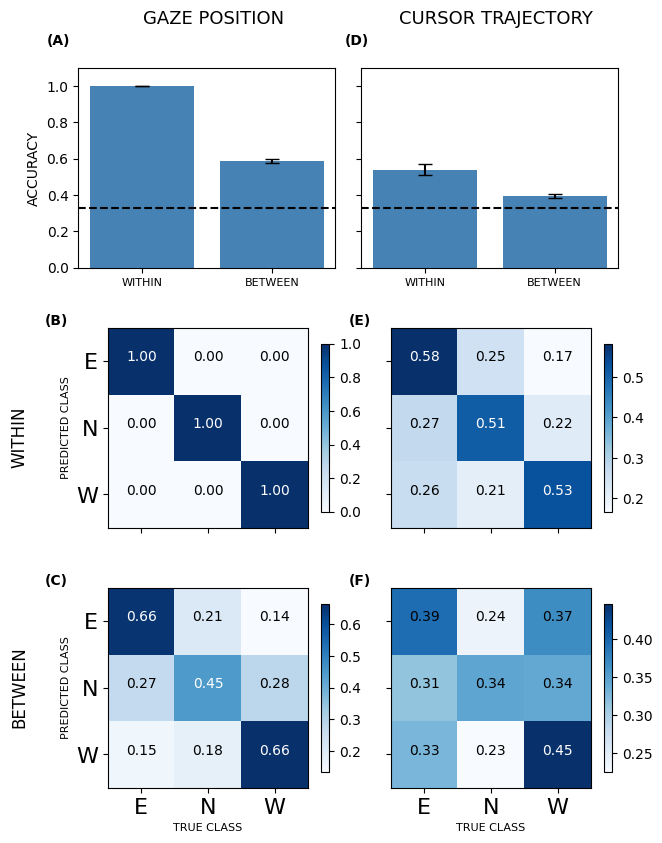

In [ ]:
# Dictionary to hold each subplot
subplots = {}

#plot the accuracy scores of
fig= plt.figure(figsize=(6, 8))
gs = gridspec.GridSpec(3, 2, height_ratios=[1,1,1], width_ratios=[1,1])

ax0 =fig.add_subplot(gs[0, 0]) # row 0, span all columns 
#Plot the accuracy score in list(accuracyMeanDict.keys())[:4]
ax0.bar(np.array(list(accuracyMeanDict.keys()))[[1,3]], np.array(list(accuracyMeanDict.values()))[[1,3]], yerr = np.array(list(accuracyStdDict.values()))[[1,3]], capsize = 5, color = "steelblue")
ax0.set_ylabel("ACCURACY")
ax0.set_ylim(0., 1.1)
ax0.tick_params(axis='x', rotation=0)
ax0.axhline(y=0.33, color='k', linestyle='--')
#replace xlabels with [ WITHIN, BETWEEN, WITHIN, BETWEEN]
ax0.set_xticklabels(["WITHIN", "BETWEEN"], fontsize=8)
ax0.annotate('GAZE POSITION', xy=(0.8,1.2), xycoords='axes fraction', fontsize=13,
                horizontalalignment='right', verticalalignment='bottom')
ax0.annotate('(A)', xy = (-.03, 1.1), fontsize=10,  xycoords='axes fraction', horizontalalignment='right', verticalalignment='bottom', fontweight='bold')

##AX1
ax1 =fig.add_subplot(gs[0, 1]) # row 0, span all columns 
#Plot the accuracy score in list(accuracyMeanDict.keys())[:4]
ax1.bar(np.array(list(accuracyMeanDict.keys()))[[0,2]], np.array(list(accuracyMeanDict.values()))[[0,2]], yerr = np.array(list(accuracyStdDict.values()))[[0,2]], capsize = 5, color = "steelblue")
ax1.set_ylabel("")
ax1.set_ylim(0., 1.1)
#remove yticks
ax1.set_yticklabels([])
ax1.tick_params(axis='x', rotation=0)
ax1.axhline(y=0.33, color='k', linestyle='--')
#replace xlabels with [ WITHIN, BETWEEN, WITHIN, BETWEEN]
ax1.set_xticklabels(["WITHIN", "BETWEEN"], fontsize=8)
ax1.annotate('CURSOR TRAJECTORY', xy=(0.9,1.2), xycoords='axes fraction', fontsize=13,
                horizontalalignment='right', verticalalignment='bottom')
ax1.annotate('(D)', xy = (0.03, 1.1), fontsize=10,  xycoords='axes fraction', horizontalalignment='right', verticalalignment='bottom', fontweight='bold')



#Plot the confusion matrix of the first casehand
class_labels = ["E", "N", "W"]
#normalize the rows of the confusion matrix
#Loop over cases and the 2x2 grid
letters = ["(B)", "(E)", "(C)", "(F)"]

for i, cases in enumerate(['WITHIN_RESTRICTED_EYE','WITHIN_RESTRICTED','BETWEEN_RESTRICTED_EYE',
'BETWEEN_RESTRICTED']):
    
    overall_cm = confusion_matrixDict[cases] / confusion_matrixDict[cases].sum(axis=1)[:, np.newaxis]
    #plot the confusion matrix
    # Store each confusion matrix subplot with a descriptive key
    subplots[f'conf_matrix_{i+1}'] = fig.add_subplot(gs[i//2 + 1, i % 2])
    ax = subplots[f'conf_matrix_{i+1}']
    ax.imshow(overall_cm,interpolation='nearest', cmap=plt.cm.Blues, aspect='auto')
    #axs[i//2, i%2].set_title(cases, fontsize=16)
    ax.tick_params(axis='both', which='major', labelsize=16)
    ax.set_xticks(np.arange(len(class_labels)))
    ax.set_yticks(np.arange(len(class_labels)))
    ax.set_xticklabels(class_labels, rotation=0)
    ax.set_yticklabels(class_labels)
    ax.set_ylabel('PREDICTED CLASS', fontsize=8)
    ax.set_xlabel('TRUE CLASS', fontsize=8)
    if i == 0 or i == 2:
        ax.annotate(letters[i], xy=(-.2,1),  xycoords='axes fraction', horizontalalignment='right', verticalalignment='bottom', fontweight='bold')
    else:
        ax.annotate(letters[i], xy=(-.1,1),  xycoords='axes fraction', horizontalalignment='right', verticalalignment='bottom', fontweight='bold')
    #plot the colorbar
    cbar = ax.figure.colorbar(ax.imshow(overall_cm,interpolation='nearest', cmap=plt.cm.Blues), ax=ax, shrink=0.84)

    #put the numbers in the confusion matrix
    for j in range(overall_cm.shape[0]):
        for k in range(overall_cm.shape[1]):
            ax.text(k, j, format(overall_cm[j, k], '.2f'), horizontalalignment="center", color="white" if overall_cm[j, k] > 0.4 else "black")

#Remove ylabels from 2 and 4
subplots['conf_matrix_2'].set_yticklabels([])
subplots['conf_matrix_2'].set_ylabel('')
subplots['conf_matrix_4'].set_yticklabels([])
subplots['conf_matrix_4'].set_ylabel('')
#Remove xlabels from 1 and 2
subplots['conf_matrix_1'].set_xticklabels([])
subplots['conf_matrix_1'].set_xlabel('')
subplots['conf_matrix_2'].set_xticklabels([])
subplots['conf_matrix_2'].set_xlabel('')

subplots['conf_matrix_1'].annotate('WITHIN', xy=(-0.4,0.3), xycoords='axes fraction', fontsize=12,
                horizontalalignment='right', verticalalignment='bottom', rotation=90)
subplots['conf_matrix_3'].annotate('BETWEEN', xy=(-0.4,0.3), xycoords='axes fraction', fontsize=12,
                horizontalalignment='right', verticalalignment='bottom', rotation=90)
#plt.tight_layout()
plt.subplots_adjust(left=0.05, right=0.95, top=0.95, bottom=0.05, wspace=0.1, hspace=0.3)

# Move ax0 slightly to the left
pos = ax0.get_position()  # get the original position
ax0.set_position([pos.x0 - 0.04, pos.y0, pos.width, pos.height])  # adjust x0 to move left

# Similarly, you can adjust ax1 if needed
pos_ax1 = ax1.get_position()
ax1.set_position([pos_ax1.x0 - 0.04, pos_ax1.y0, pos_ax1.width, pos_ax1.height])
#plt.savefig("./FIGURE_3PROVA.png", dpi = 300, bbox_inches = 'tight')
plt.show()